# Intrduction to Neural Networks #

Artificial Neural Networks are modeled on the human brain. They are true learning networks in that they self-optimize with a learning function that is designed to reduce the error of each processing cycle. This is why Neural Networks work well with large datasets and unstructured data.

As the name indicates, Neural Networks consist of neurons, where the data processing happens, and dendrites and axons that make up the pathways between neurons. 

Each neuron contains essentially two functions:
1. The summary function, which aggregates input data and passes its output on to the 
2. Activation function, which applies a previously defined algorithm to the data it has received from the summary function. 

The data enter the Neural Network through the **INPUT LAYER** and the classification results are found in the **OUTPUT LAYER**. As the data makes its way through the network, its value is determined by weights. These weights are adjusted by an algorithm called a perceptron, whose goal is to minimize error values. Click below for an image:

https://github.com/shstreuber/Data-Mining/blob/master/images/neuralnetwork.jpeg

Below, we will use a multilayer neural network in the machine learning workflow for classifying flower species with sklearn and other python libraries.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualization
import matplotlib.pyplot as plt

import sklearn

We will be using the iris dataset again, since we are familiar with it.

In [12]:
# Importing the iris dataset from an internet source

iris = pd.read_csv('https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. Data Exploration ##

In [13]:
# Testing for missing values

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


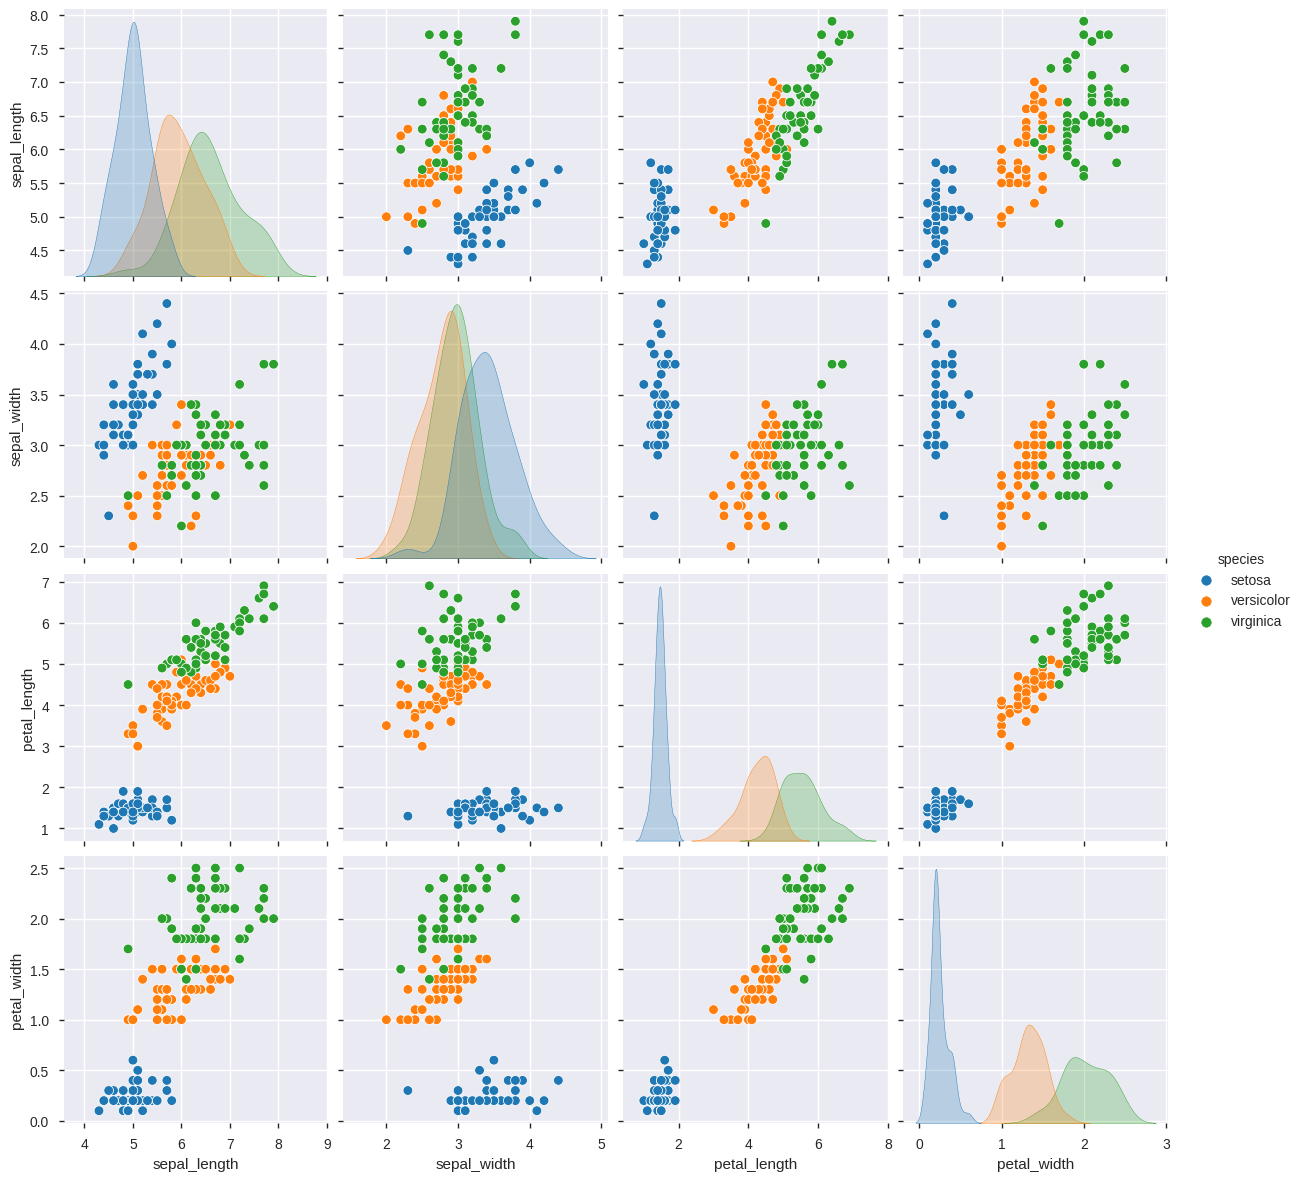

In [14]:
# Visualizing the data with a pairplot because why not?
# Let's investigate what kinds of relationships exist between the variables.

sns.pairplot(iris,hue="species", height=3, diag_kind="kde")

We can see that the dataset is highly structured with linear relationships among the features. If we had a three dimensional plot, the separation among the classes would be even more clear.
This finding is important in the algorithm selection part because it tells us that a simpler model like a Random Forest or a logistic regression will be just as effective as a neural net. 

## 2. Splitting the data into Training and Test Set

In [15]:
from sklearn.model_selection import train_test_split
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##3. Preparing the Data for Predictive Analysis

### 3.1 We will encode categorical variables with LabelEncoder() since a predictive model cannot work with categorical variables.

In [16]:
# Replace setosa with 0, versicolor with 1, and virginica with 2 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
iris["species"] = labelencoder.fit_transform(iris["species"])
species = pd.DataFrame({'species': ['setosa', 'versicolor', 'virginica']})
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


LabelEncoder introduced a new problem (noise) to our dataset: The numbers look like ordinal relationships--but versicolor(1) is not higher than setosa(0) and setosa(0) is not smaller than virginica(2). This is why we need a three dimensional vector. Thus, setosa would be [1,0,0], versicolor would be [0,1,0] and virginica [0,0,1].

In [17]:
# Onehotencoder works with a matrix of integers whereas getdummies works with a dataframe
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
iris = create_dummies(iris,"species")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_0,species_1,species_2
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0


### 3.2 Standardizing the Data ##
The second preprocessing technique is to scale our data with StandardScaler() especially because Neural Networks are sensitive to unnormalized features. This helps us to speed up our algorithm (gradient descent) and have a more accurate classifier.

In [18]:
# Features before mean normalization
unscaled_features = X_train

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
X_train_array = sc.fit_transform(X_train.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

# Center test data with the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
89,-0.413160,-1.264142,0.111670,0.123380
142,-0.063189,-0.791566,0.738922,0.938370
95,-0.179846,-0.082701,0.225716,-0.012451
39,-0.879788,0.862452,-1.313902,-1.370767
44,-0.879788,1.807605,-1.085811,-1.099104


## 4. Determine Neural Network Architecture and Build Model

The model architecture is about the number or nodes in each layer, the number of layers, and the way that nodes are connected (feedforward, no loops between the units). 

The number of nodes in the input and output layers is determined by the dimensionality of the problem: We have 4 input units (sepal_length, sepal_width, petal_length, petal_width) and 3 output units (setosa, versicolor, virginica). 

However, determining the number of hidden nodes is not as easy. Typically, 10 nodes in the hidden layer tends to work better when the first hidden layer is larger than the input layer.

We will use the [Multilayer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for this. The most salient parameters are:

* hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

* activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
Activation function for the hidden layer.

  * ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

  * ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

  * ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

  * ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

* solver {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization. We will talk about this more when we talk about Gradient Descent

  * ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

  * ‘sgd’ refers to stochastic gradient descent.

  * ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

* batch_size int, default=’auto’
Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

* max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

* verbose bool, default=False
Whether to print progress messages to stdout.

* validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True


In [19]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# running this with all the default settings, including a hidden_layer_sizes setting of 100 adn 200 maximum iterations. 
# Verbose is on so we can see how this runs.

mlp1 = MLPClassifier(verbose=1) 

## 5. Train the Model ##


In [20]:
# As this runs in verbose mode, note how the loss function steps down with every single iteration!

mlp1.fit(X_train, y_train)

Iteration 1, loss = 1.12451692
Iteration 2, loss = 1.10162456
Iteration 3, loss = 1.07923957
Iteration 4, loss = 1.05738174
Iteration 5, loss = 1.03601474
Iteration 6, loss = 1.01511735
Iteration 7, loss = 0.99466429
Iteration 8, loss = 0.97470303
Iteration 9, loss = 0.95523766
Iteration 10, loss = 0.93628065
Iteration 11, loss = 0.91781617
Iteration 12, loss = 0.89984335
Iteration 13, loss = 0.88233853
Iteration 14, loss = 0.86531022
Iteration 15, loss = 0.84872973
Iteration 16, loss = 0.83259818
Iteration 17, loss = 0.81692374
Iteration 18, loss = 0.80168844
Iteration 19, loss = 0.78688303
Iteration 20, loss = 0.77249110
Iteration 21, loss = 0.75851006
Iteration 22, loss = 0.74494016
Iteration 23, loss = 0.73175646
Iteration 24, loss = 0.71894455
Iteration 25, loss = 0.70650782
Iteration 26, loss = 0.69443818
Iteration 27, loss = 0.68270709
Iteration 28, loss = 0.67130634
Iteration 29, loss = 0.66024751
Iteration 30, loss = 0.64953061
Iteration 31, loss = 0.63913127
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

The output here shows how the function is configured: 
* Relu: The units in the hidden layer apply the activation function to induce a sense of non-linearity in the network. Relu tells us how close these z are to 1 (1= we discover a pattern, namely a feature combination that leads to this output). In this way, we are discovering patterns from examining input-output examples. Without an activation function, NN would just be a linear regression function.
* 1 Epoch = 1 pass over the entire dataset
* Batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you’ll need.

## 6. Test the Model ##


In [21]:
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print (mlp1.score(X_test,y_test))

0.9333333333333333


## 7. Evaluate the Quality ##

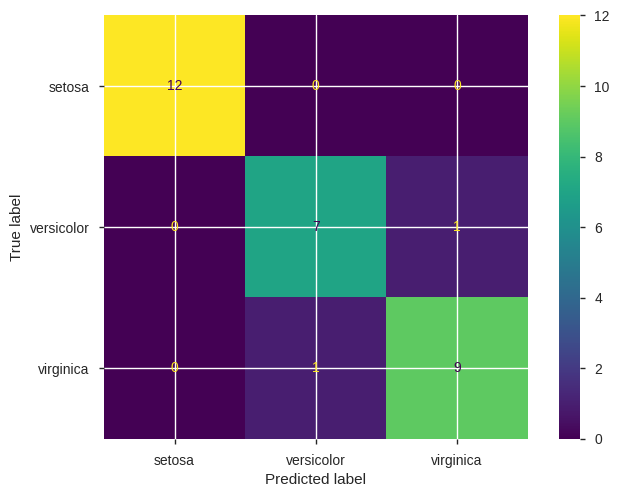

In [22]:
# Set up COnfusion Matrix

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp1, X_test, y_test)

## 8. Using the model for prediction

In [23]:
# Now, let's test this model
y_pred = mlp1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'virginica']


In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred, labels=['virginica','setosa','versicolor']))

              precision    recall  f1-score   support

   virginica       0.90      0.90      0.90        10
      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



# Gradient Descent #

Gradient Descent is a way to optimize how quickly the weights are adjusted in the Neural Network, i.e. how often the Feed Forward-Backpropagation loop has to run to optimize the error aka loss function. 

Below, we will re-run the MLP Classifier with the parameters shown.

* Stochastic Gradient Descent (SGD) optimizer/solver: updates weights values that minimize the loss function in batches. As the name says, SGD uses the gradient of the loss function. Use parameter solver = sgd.

* learning_rate_init=0.01: This parameter controls the step-size in updating the weights, and here is constant. Its value shouldn’t be too large( fail to converge) neither too small (too slow).

* max_iter=500 : maximum number of epochs (=how many times each data point will be used until solver convergence).

In [25]:
mlp2 = MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.01, max_iter=500, verbose = 1)

## YOUR JOB:

1. Fit the test data to mlp2, then produce a confusion matrix and a correlation report, and see if changing the parameters has made any difference.
2. Produce an mlp3 model in which you change the solver and the learning rate  however you want (leave verbose on, though). This will change the Gradient Descent. What difference has this made?